In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
astro_df = pd.read_csv('Kaggle/classification_in_asteroseismology.csv')

astro_df.head()

,POP,Dnu,numax,epsilon
0,1,4.44780,43.06289,0.985
1,0,6.94399,74.07646,0.150
2,1,2.64571,21.57891,0.855
3,1,4.24168,32.13189,0.840
4,0,10.44719,120.37356,0.275


In [3]:
astro_df.columns


#POP = Population of stars is either (0=Red Giant Branch | 1=Helium Burning)

#Dnu = Mean large Frequency modes in delta nu

#numax = Frequency maximum oscillation power

#epsilon = is location of (I=0 mode)

Index(['POP', 'Dnu', 'numax', 'epsilon'], dtype='object')

In [4]:
astro_df.isnull().sum()

POP        0
Dnu        0
numax      0
epsilon    0
dtype: int64

<AxesSubplot:xlabel='POP', ylabel='count'>

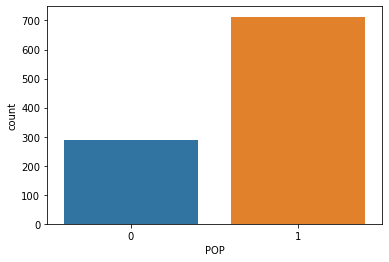

In [5]:
sns.countplot(data=astro_df, x='POP')

#data is unbalanced

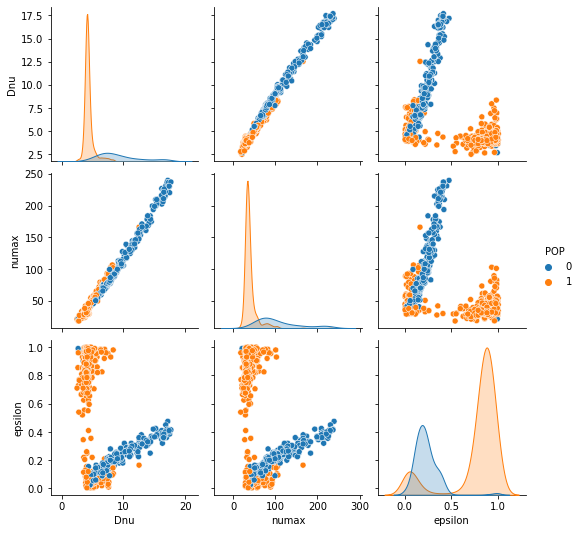

In [26]:
sns.pairplot(astro_df, hue='POP')

<AxesSubplot:xlabel='POP', ylabel='epsilon'>

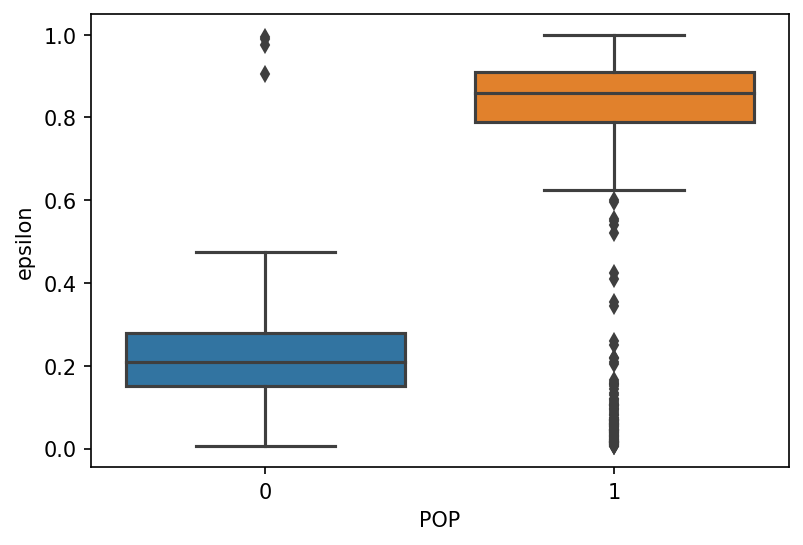

In [29]:
plt.figure(dpi=150)
sns.boxplot(x='POP', y='epsilon', data=astro_df)

<AxesSubplot:xlabel='POP', ylabel='numax'>

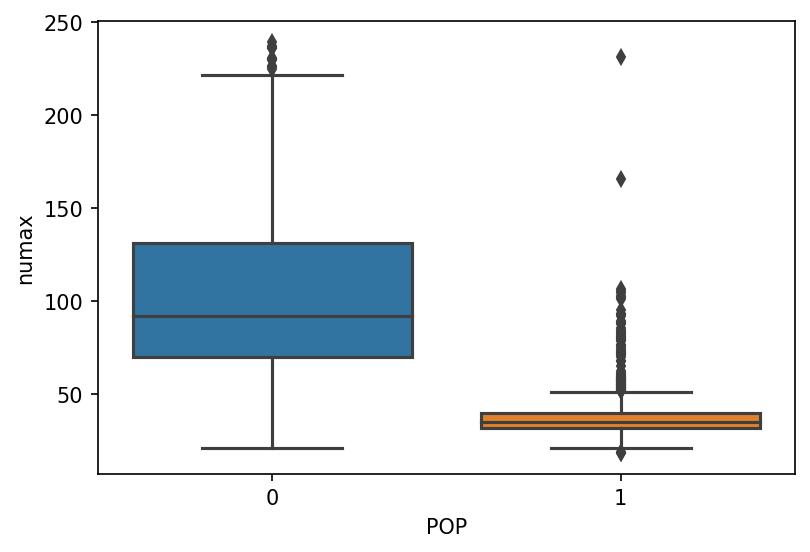

In [30]:
plt.figure(dpi=150)
sns.boxplot(x='POP', y='numax', data=astro_df)

<AxesSubplot:xlabel='POP', ylabel='Dnu'>

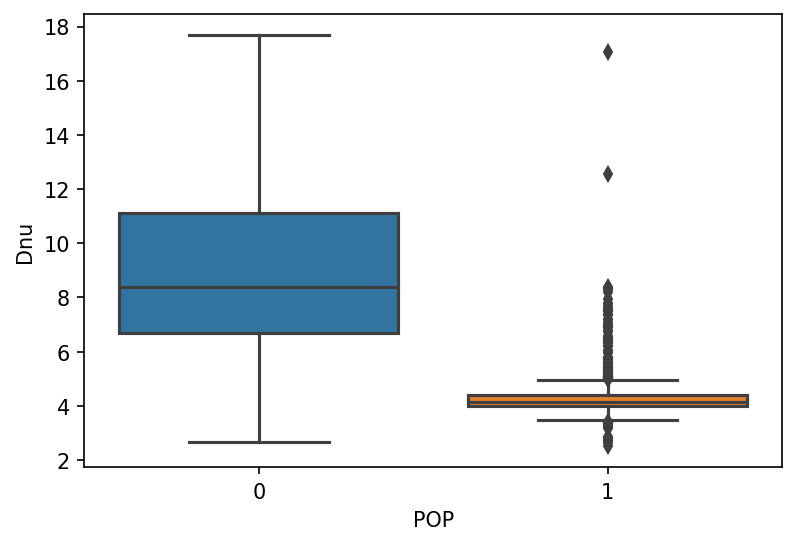

In [31]:
plt.figure(dpi=150)
sns.boxplot(x='POP', y='Dnu', data=astro_df)

<AxesSubplot:>

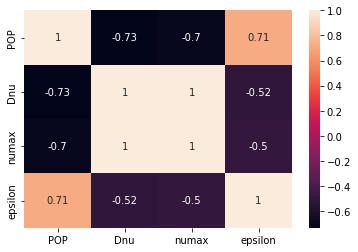

In [32]:
sns.heatmap(astro_df.corr(), annot=True)

In [33]:
X = astro_df.drop('POP', axis=1)

y = astro_df['POP']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=101)

In [36]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = log_model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
print(classification_report(y_test, y_pred))


#99% accuracy
#92% precision

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.99      0.97      0.98        78

    accuracy                           0.97       101
   macro avg       0.95      0.97      0.96       101
weighted avg       0.97      0.97      0.97       101



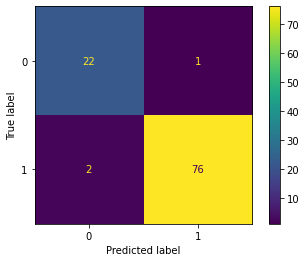

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model, X_test, y_test)